In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('List of Countries by Sugarcane Production.csv')
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [3]:
df.shape

(103, 7)

## Data Cleaning

In [4]:
df['Production (Tons)']=df['Production (Tons)'].str.replace('.','') # Removing comma
df['Production per Person (Kg)']=df['Production per Person (Kg)'].str.replace('.','').str.replace(',','.')# removing decimal and replacing ',' with '.'
df['Acreage (Hectare)']=df['Acreage (Hectare)'].str.replace('.','') # removing decimal
df['Yield (Kg / Hectare)']=df['Yield (Kg / Hectare)'].str.replace('.','').str.replace(',','.')# removing decimal and replacing ',' with '.'
df

C:\Users\sahil\AppData\Local\Temp\ipykernel_12108\2260370836.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Production (Tons)']=df['Production (Tons)'].str.replace('.','') # Removing comma
C:\Users\sahil\AppData\Local\Temp\ipykernel_12108\2260370836.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Production per Person (Kg)']=df['Production per Person (Kg)'].str.replace('.','').str.replace(',','.')# removing decimal and replacing ',' with '.'
C:\Users\sahil\AppData\Local\Temp\ipykernel_12108\2260370836.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not*

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...,...
98,98,Lebanon,Asia,97,16,3,28386.4
99,99,Djibouti,Africa,53,51,NaN,NaN
100,100,Singapore,Asia,50,9,2,25
101,101,Samoa,Oceania,12,6,1,11949.8


In [5]:
# Renaming columns to removing extra spaces
df.rename(columns={'Production (Tons)':'Production(Tons)'},inplace=True)
df.rename(columns={'Production per Person (Kg)':'Production_per_Person(Kg)'},inplace=True)
df.rename(columns={'Acreage (Hectare)':'Acreage(Hectare)'},inplace=True)
df.rename(columns={'Yield (Kg / Hectare)':'Yield(Kg/Hectare)'},inplace=True)
df

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...,...
98,98,Lebanon,Asia,97,16,3,28386.4
99,99,Djibouti,Africa,53,51,NaN,NaN
100,100,Singapore,Asia,50,9,2,25
101,101,Samoa,Oceania,12,6,1,11949.8


In [6]:
df.isnull().sum()

Unnamed: 0                   0
Country                      0
Continent                    0
Production(Tons)             0
Production_per_Person(Kg)    0
Acreage(Hectare)             1
Yield(Kg/Hectare)            1
dtype: int64

In [7]:
df[df['Acreage(Hectare)'].isnull()]

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [8]:
df.dropna().reset_index()

,index,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...,...,...
97,97,97,Spain,Europe,394,8,9,43596.5
98,98,98,Lebanon,Asia,97,16,3,28386.4
99,100,100,Singapore,Asia,50,9,2,25
100,101,101,Samoa,Oceania,12,6,1,11949.8


In [9]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [10]:
df.dtypes

Country                      object
Continent                    object
Production(Tons)             object
Production_per_Person(Kg)    object
Acreage(Hectare)             object
Yield(Kg/Hectare)            object
dtype: object

In [11]:
 # Converting the datatypes of numerical columns to float
df['Production(Tons)']=df['Production(Tons)'].astype(float)
df['Production_per_Person(Kg)']=df['Production_per_Person(Kg)'].astype(float)
df['Acreage(Hectare)']=df['Acreage(Hectare)'].astype(float)
df['Yield(Kg/Hectare)']=df['Yield(Kg/Hectare)'].astype(float)

In [12]:
df.dtypes

Country                       object
Continent                     object
Production(Tons)             float64
Production_per_Person(Kg)    float64
Acreage(Hectare)             float64
Yield(Kg/Hectare)            float64
dtype: object

In [13]:
df.nunique() # Unique values 

Country                      103
Continent                      6
Production(Tons)             103
Production_per_Person(Kg)    102
Acreage(Hectare)             101
Yield(Kg/Hectare)            102
dtype: int64

## Univariate Analysis

In [14]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


### How many countries produce sugarcane from each continent

In [15]:
df['Continent'].value_counts() # There are 39 countries in Africa,25 in Asia,22 in NA, so on...

Africa           39
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: Continent, dtype: int64

<AxesSubplot:>

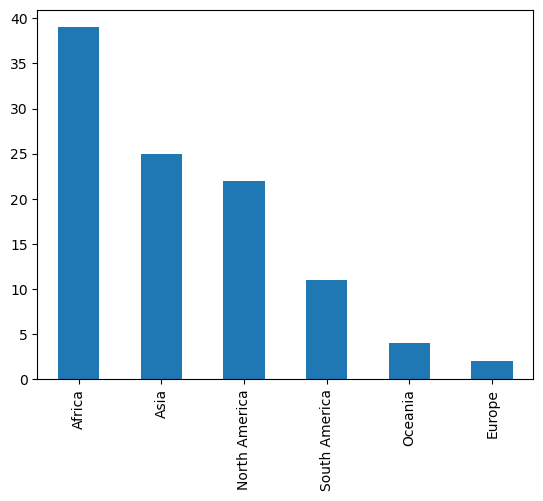

In [16]:
df['Continent'].value_counts().plot(kind='bar')

### Distribution of columns

C:\Users\sahil\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sahil\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sahil\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='Yield(Kg/Hectare)', ylabel='Density'>

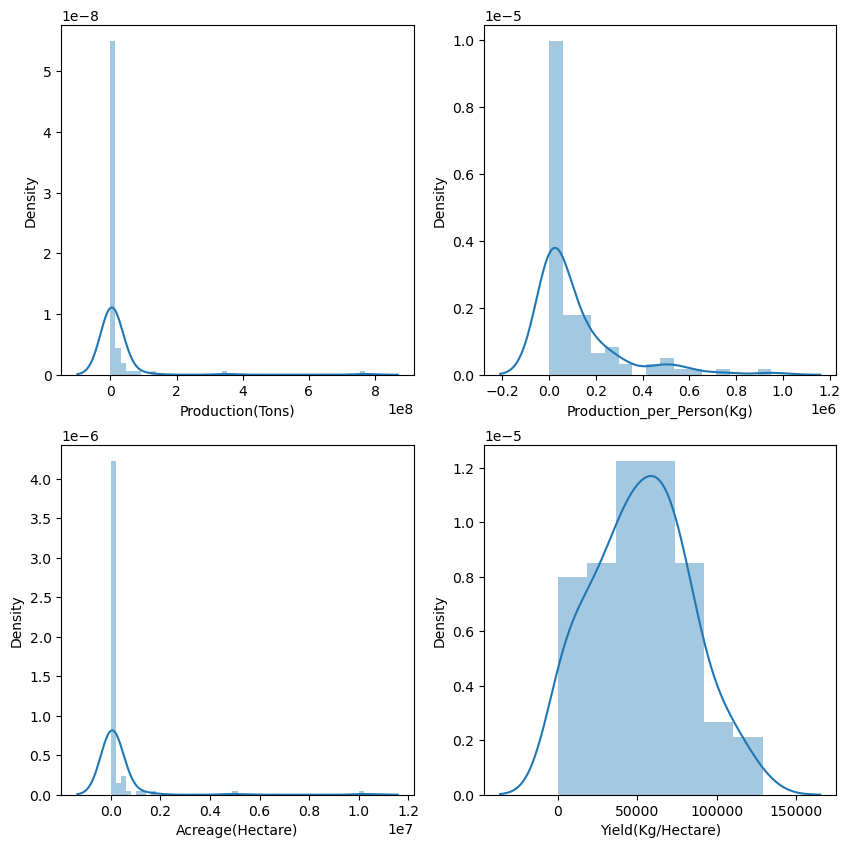

In [17]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(df['Production(Tons)'])
plt.subplot(2,2,2)
sns.distplot(df['Production_per_Person(Kg)'])
plt.subplot(2,2,3)
sns.distplot(df['Acreage(Hectare)'])
plt.subplot(2,2,4)
sns.distplot(df['Yield(Kg/Hectare)'])

### Here Yield(Kg/Hectare) has normal distribution but others have a skewed distibution

### Checking for outliers

<AxesSubplot:ylabel='Yield(Kg/Hectare)'>

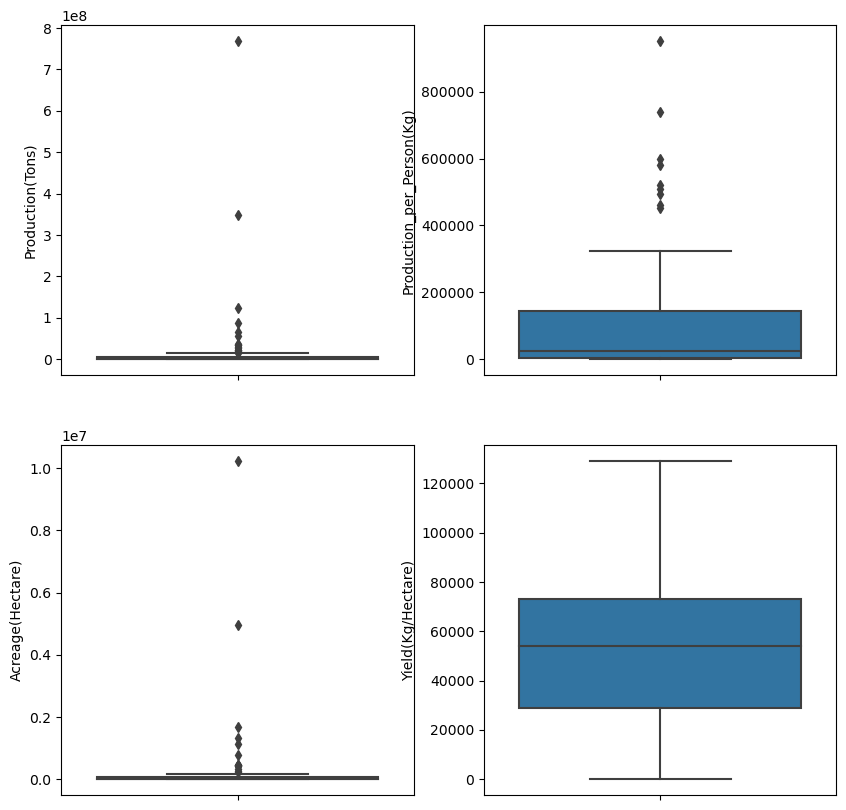

In [18]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(y=df['Production(Tons)'])
plt.subplot(2,2,2)
sns.boxplot(y=df['Production_per_Person(Kg)'])
plt.subplot(2,2,3)
sns.boxplot(y=df['Acreage(Hectare)'])
plt.subplot(2,2,4)
sns.boxplot(y=df['Yield(Kg/Hectare)'])

In [19]:
df.describe()

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,1.030000e+02,103.000000,1.020000e+02,102.000000
mean,1.832407e+07,111856.305311,2.498981e+05,52628.078431
std,8.379760e+07,176134.928689,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,4.298850e+04,3364.869000,1.104000e+03,29072.025000
50%,1.422432e+06,25481.000000,1.655800e+04,54108.950000
75%,6.145648e+06,144004.500000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


## Bivariate Analysis

In [20]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


### Which countries are producing the maximum amount of sugarcanes

In [21]:
df_new=df[['Country','Production(Tons)']]
df_new

,Country,Production(Tons)
0,Brazil,768678382.0
1,India,348448000.0
2,China,123059739.0
3,Thailand,87468496.0
4,Pakistan,65450704.0
...,...,...
98,Lebanon,97.0
99,Djibouti,53.0
100,Singapore,50.0
101,Samoa,12.0


In [22]:
df_new['Production %']=df_new['Production(Tons)']*100/df_new['Production(Tons)'].sum()
df_new

C:\Users\sahil\AppData\Local\Temp\ipykernel_12108\4231742780.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Production %']=df_new['Production(Tons)']*100/df_new['Production(Tons)'].sum()


,Country,Production(Tons),Production %
0,Brazil,768678382.0,4.072728e+01
1,India,348448000.0,1.846200e+01
2,China,123059739.0,6.520138e+00
3,Thailand,87468496.0,4.634389e+00
4,Pakistan,65450704.0,3.467809e+00
...,...,...,...
98,Lebanon,97.0,5.139401e-06
99,Djibouti,53.0,2.808126e-06
100,Singapore,50.0,2.649176e-06
101,Samoa,12.0,6.358022e-07


### Pie Chart

<AxesSubplot:ylabel='Production %'>

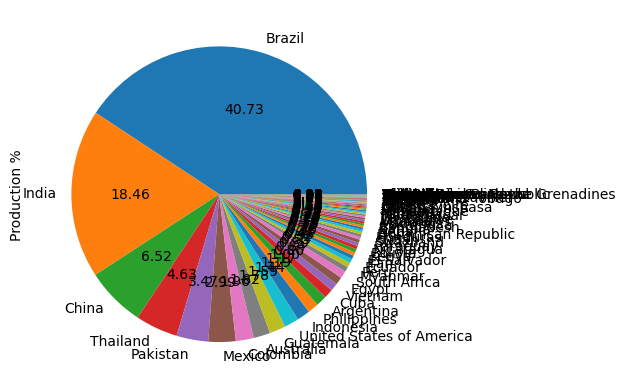

In [23]:
df_new['Production %'].plot(kind='pie',labels=df['Country'],autopct='%.2f')

### Bar Chart

Text(0, 0.5, 'Production %')

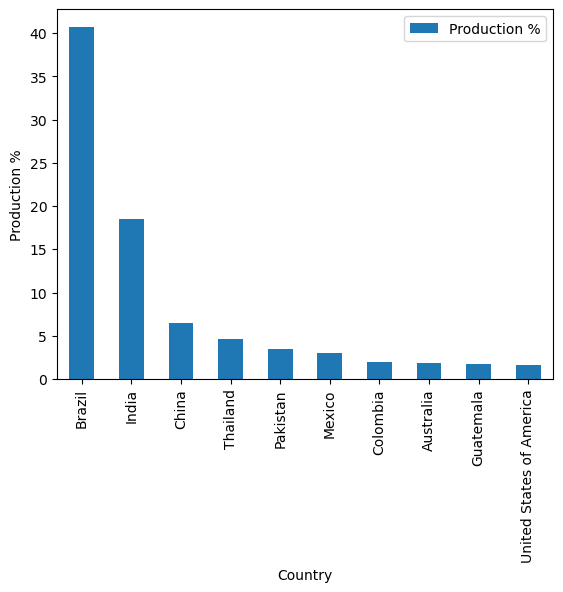

In [24]:
# Showing for first 10 rows as there is too much data
df_new.head(10).plot(kind='bar',x='Country',y='Production %')
plt.xlabel('Country')
plt.ylabel('Production %')

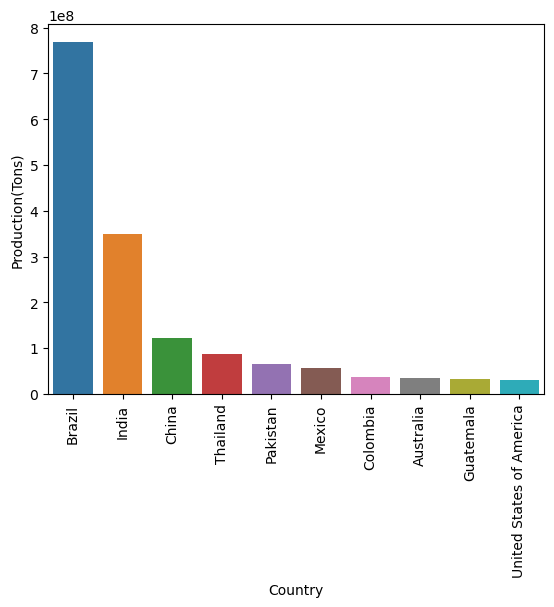

In [25]:
# Barchart using seaborn library
ax=sns.barplot(data=df.head(10),x='Country',y='Production(Tons)')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90) # doesnt let the names in x axis overlap
plt.show()

## Which country has the biggest land area ?

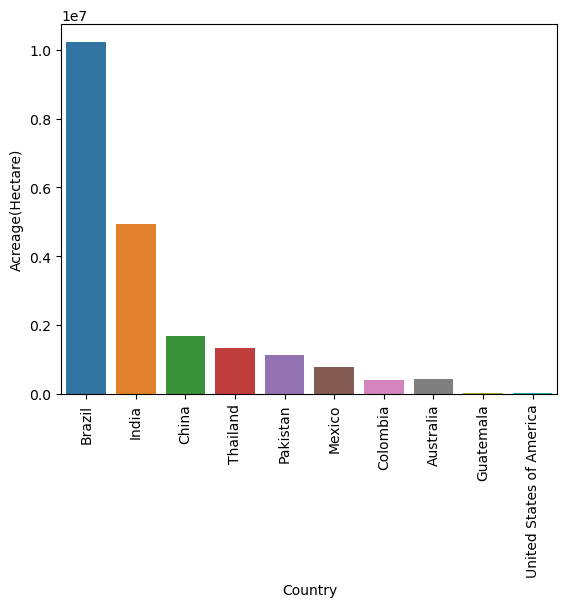

In [26]:
ax=sns.barplot(data=df.head(10),x='Country',y='Acreage(Hectare)')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90) # doesnt let the names in x axis overlap
plt.show()
# Its not sorted thats why we will create a df with the sorted values

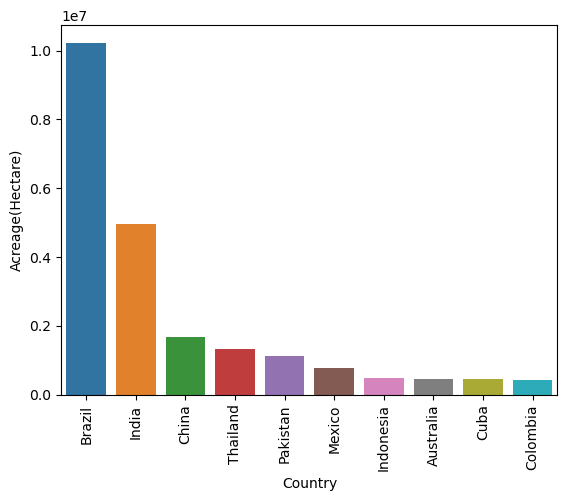

In [28]:
df_acr=df.sort_values('Acreage(Hectare)',ascending=False)
ax=sns.barplot(data=df_acr.head(10),x='Country',y='Acreage(Hectare)')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90) # doesnt let the names in x axis overlap
plt.show()

## Which country has the highest  yield per hectare?

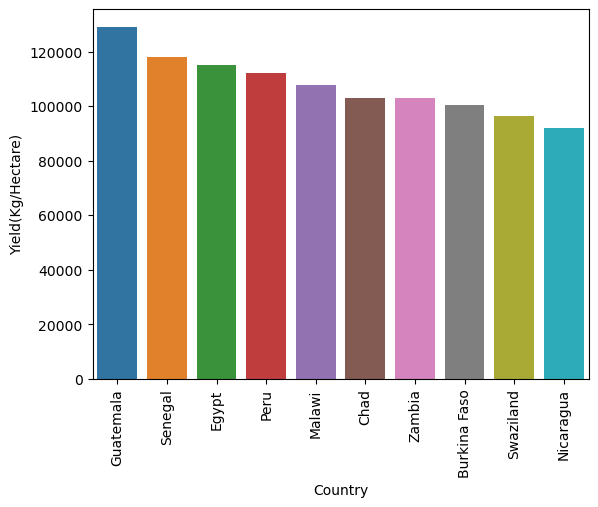

In [30]:
df_yield=df.sort_values('Yield(Kg/Hectare)',ascending=False)
ax=sns.barplot(data=df_yield.head(10),x='Country',y='Yield(Kg/Hectare)')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90) # doesnt let the names in x axis overlap
plt.show()

## Which country has the highest production per person?

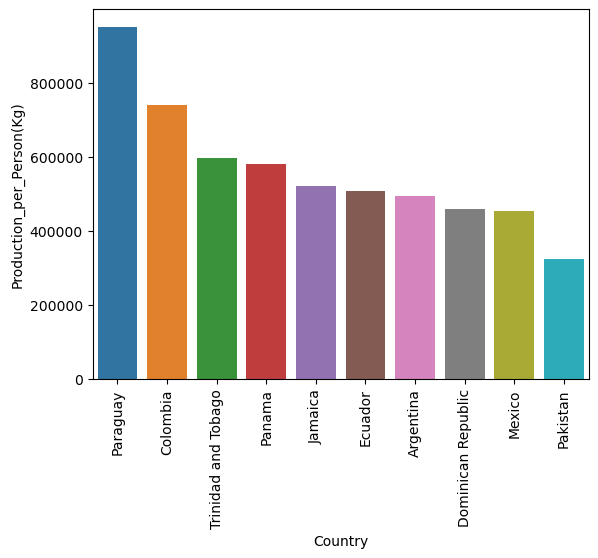

In [31]:
df_pro=df.sort_values('Production_per_Person(Kg)',ascending=False)
ax=sns.barplot(data=df_pro.head(10),x='Country',y='Production_per_Person(Kg)')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90) # doesnt let the names in x axis overlap
plt.show()

## Correlation

In [32]:
df.corr()

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Production(Tons),1.000000,0.016341,0.997550,0.132812
Production_per_Person(Kg),0.016341,1.000000,0.012557,0.017999
Acreage(Hectare),0.997550,0.012557,1.000000,0.113433
Yield(Kg/Hectare),0.132812,0.017999,0.113433,1.000000


<AxesSubplot:>

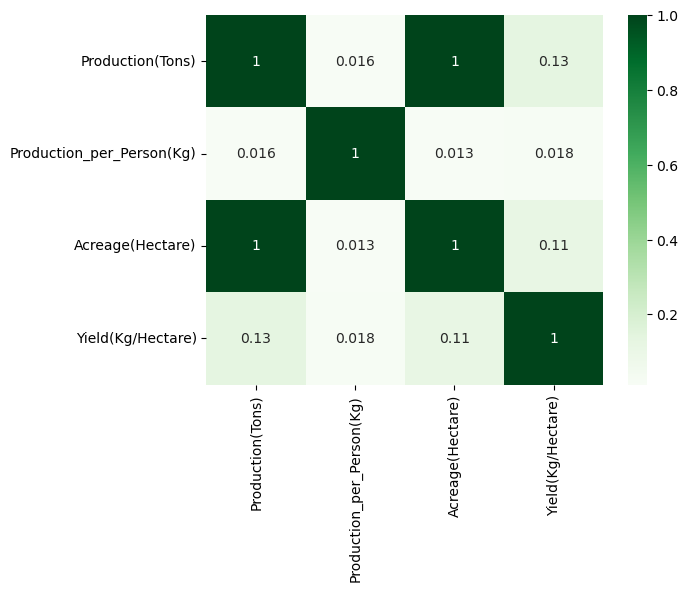

In [34]:
sns.heatmap(df.corr(),annot=True,cmap='Greens')

## Do countries with highest land produce more sugarcane?

<AxesSubplot:xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

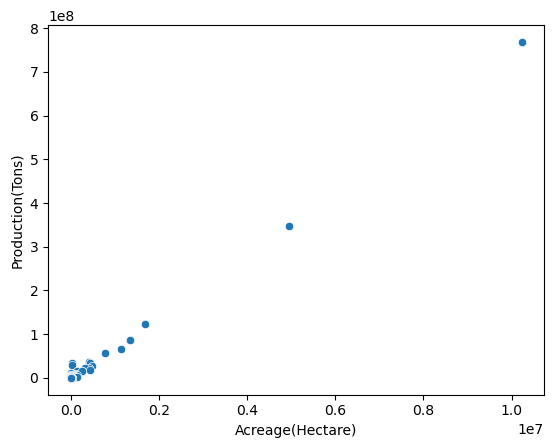

In [35]:
sns.scatterplot(data=df,x='Acreage(Hectare)',y='Production(Tons)')

## 1st Brazil, 2nd India and 3rd China

## Do countries that yield more sugarcane per hectare produce more sugarcane in total?

<AxesSubplot:xlabel='Yield(Kg/Hectare)', ylabel='Production(Tons)'>

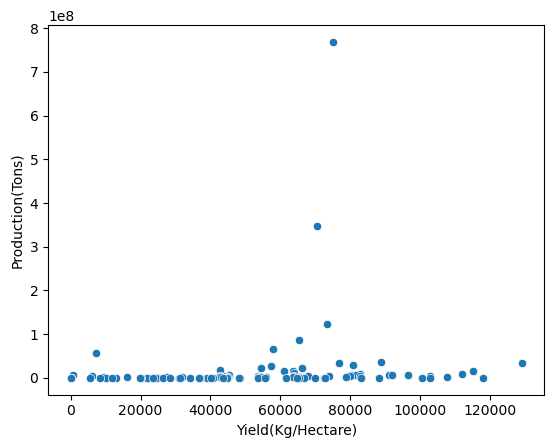

In [36]:
sns.scatterplot(data=df,x='Yield(Kg/Hectare)',y='Production(Tons)')

## There's no correlation 

## Analysis for continent

In [38]:
# Creating a dataframe for continent
df_continent=df.groupby('Continent').sum()
df_continent

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Continent,,,,
Africa,89681525.0,2332687.293,1439089.0,2142107.5
Asia,721930425.0,1857769.303,10608319.0,1171871.4
Europe,5823.0,536.000,71.0,131870.9
North America,173995947.0,3796081.508,1581983.0,1082602.4
Oceania,36177574.0,28593.605,490909.0,162419.1
South America,865588126.0,3505531.738,11369236.0,677192.7


## Which continent produces the max sugarcane?

<AxesSubplot:xlabel='Continent'>

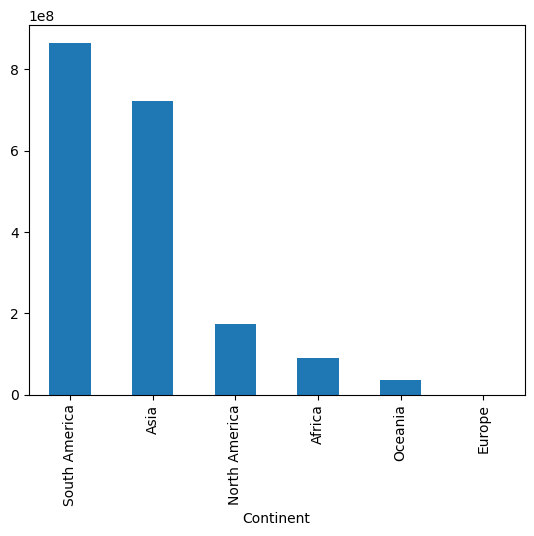

In [39]:
df_continent['Production(Tons)'].sort_values(ascending=False).plot(kind='bar')

## Do number of countries in a continent effect production of sugarcane?

In [40]:
df_continent['Number_of_countries']=df.groupby("Continent").count()['Country']
df_continent

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare),Number_of_countries
Continent,,,,,
Africa,89681525.0,2332687.293,1439089.0,2142107.5,39
Asia,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,5823.0,536.000,71.0,131870.9,2
North America,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,36177574.0,28593.605,490909.0,162419.1,4
South America,865588126.0,3505531.738,11369236.0,677192.7,11


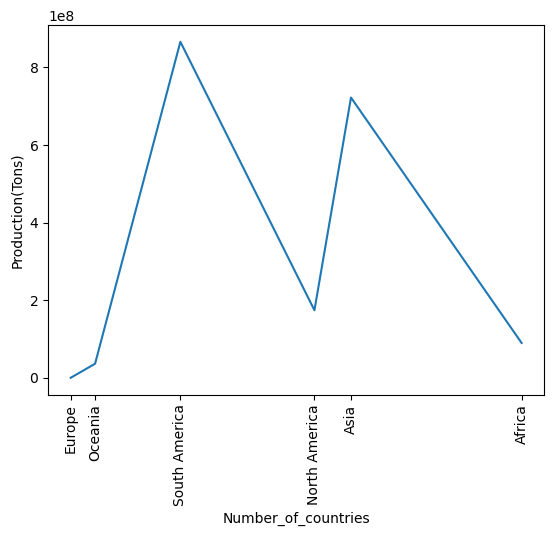

In [44]:
continent_names=df_continent.index.to_list()
sns.lineplot(data=df_continent,x='Number_of_countries',y='Production(Tons)')
plt.xticks(df_continent['Number_of_countries'],continent_names,rotation=90) # doesnt let the names in x axis overlap
plt.show()

## Correlation for continent

In [45]:
df_continent.corr()

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare),Number_of_countries
Production(Tons),1.000000,0.522207,0.994897,0.091201,0.098495
Production_per_Person(Kg),0.522207,1.000000,0.463211,0.542971,0.531984
Acreage(Hectare),0.994897,0.463211,1.000000,0.111166,0.122407
Yield(Kg/Hectare),0.091201,0.542971,0.111166,1.000000,0.991746
Number_of_countries,0.098495,0.531984,0.122407,0.991746,1.000000


## Production distribution by continent

<AxesSubplot:ylabel='Production(Tons)'>

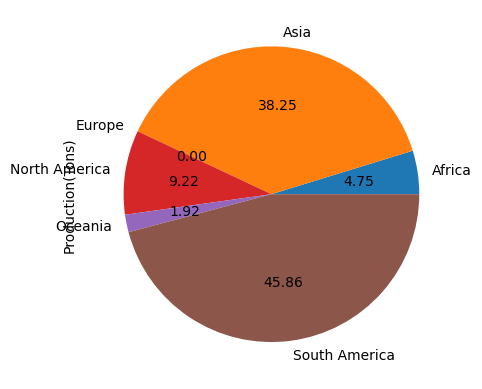

In [46]:
df_continent['Production(Tons)'].plot(kind='pie',autopct='%.2f')